In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

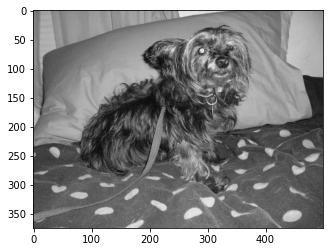

In [12]:
DATADIR = "C:/datasets/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [13]:
print(img_array.shape)

(375, 500)


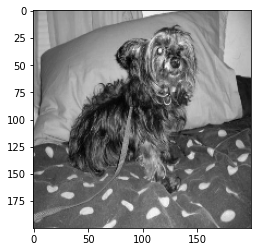

In [15]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [16]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [17]:
print(len(training_data))

24946


In [18]:
import random

random.shuffle(training_data)

In [19]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
1
1
0
1
0
1


In [20]:
X = []
y = []

In [21]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [22]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [23]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [24]:
X[1]

array([[[123],
        [123],
        [117],
        ...,
        [ 27],
        [ 33],
        [ 81]],

       [[124],
        [121],
        [120],
        ...,
        [ 27],
        [ 40],
        [ 87]],

       [[122],
        [119],
        [119],
        ...,
        [ 27],
        [ 42],
        [ 92]],

       ...,

       [[ 52],
        [ 52],
        [ 53],
        ...,
        [ 90],
        [ 94],
        [ 96]],

       [[ 57],
        [ 57],
        [ 57],
        ...,
        [ 96],
        [ 89],
        [102]],

       [[ 59],
        [ 57],
        [ 55],
        ...,
        [101],
        [ 88],
        [101]]], dtype=uint8)